In [25]:
import pandas as pd
import networkx as nx
import json
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.readwrite import json_graph

In [26]:
data_scopus = pd.read_csv("./data/data_scopus.csv")
columns_to_remove = ['Abstract', 'Conference name', 'Conference date', 'Abbreviated Source Title']
data_scopus.drop(columns=columns_to_remove, inplace=True)
data_scopus = data_scopus[~pd.isnull(data_scopus['Publisher'])].copy()
data_scopus = data_scopus[~pd.isnull(data_scopus['Authors'])].copy()
data_scopus = data_scopus[~pd.isnull(data_scopus['Year'])].copy()
data_scopus = data_scopus[~pd.isnull(data_scopus['Authors with affiliations'])].copy()
data_scopus['Cited by'].fillna(0.0, inplace=True)
data_scopus.head(2)

,Title,Year,EID,Publisher,Authors,Author(s) ID,Authors with affiliations,Source title,Cited by
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,Elsevier B.V.,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,0.0
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,Academic Press,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,0.0


In [27]:
def extract_countries(authors_with_affiliations):
    countries = []
    affiliations = authors_with_affiliations.split(";")
    
    i = 0
    while i < len(affiliations):
        aff = affiliations[i].strip()
        elements = aff.split(", ")
        country = elements[-1]
        countries.append(country)
        i += 1

    return ', '.join(countries)

data_scopus['Author_Countries'] = data_scopus['Authors with affiliations'].apply(extract_countries)



set_countries = set()

index = 0
while index < len(data_scopus):
    row = data_scopus.iloc[index]
    
    i = 0
    while i < len(row['Author_Countries'].split(",")):
        set_countries.add(row['Author_Countries'].split(",")[i].strip())
        i += 1
    
    index += 1

set_countries



{'Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Czech Republic',
 'Denmark',
 'Ecuador',
 'Egypt',
 'Finland',
 'France',
 'Gabon',
 'Germany',
 'Greece',
 'Hong Kong',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Lebanon',
 'Netherlands',
 'Norway',
 'Pakistan',
 'Philippines',
 'Poland',
 'Polytechnic Univ',
 'Portugal',
 'Qatar',
 'Romania',
 'Russian Federation',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'Slovakia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Thailand',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 'United Kingdom',
 'United States',
 'Univ of Massachusetts at Lowell',
 'Visible Decisions Inc'}

In [28]:
G = nx.Graph()
nodes_dict = {}
for index, row in data_scopus.iterrows():
    author_ids = row['Author(s) ID'].split(';')
    countries = row['Author_Countries'].split(',')
    names = row['Authors'].split(',')

    i = -1
    author_index = 0

    while author_index < len(author_ids):
        author_id = author_ids[author_index]

        if author_id not in nodes_dict:
            nodes_dict[author_id] = {
                "Name": names[i].strip(),
                "country": countries[i],
                "num_publications": 0,
                "num_citations": 0,
                "degree": 0,
                "id": author_id
            }

        i += 1
        author_index += 1

        nodes_dict[author_id]["num_publications"] += 1
        nodes_dict[author_id]["num_citations"] += row['Cited by']
        nodes_dict[author_id]["degree"] += len(author_ids) - 1
nodes = list(nodes_dict.values())

print(nodes)

node_keys = list(nodes_dict.keys())
node_index = 0
while node_index < len(node_keys):
    node_id = node_keys[node_index]
    G.add_node(node_id, **nodes_dict[node_id])
    node_index += 1

print(G.nodes(data=True))

[{'Name': 'Al-Hussein M.', 'country': ' Canada', 'num_publications': 1, 'num_citations': 0.0, 'degree': 4, 'id': '57202536919'}, {'Name': 'Zhang Y.', 'country': 'Canada', 'num_publications': 2, 'num_citations': 19.0, 'degree': 8, 'id': '53984550800'}, {'Name': 'Liu H.', 'country': ' United States', 'num_publications': 1, 'num_citations': 0.0, 'degree': 4, 'id': '57215426514'}, {'Name': 'Kang S.-C.', 'country': ' Canada', 'num_publications': 2, 'num_citations': 19.0, 'degree': 8, 'id': '6603541102'}, {'Name': 'Al-Hussein M.', 'country': ' Canada', 'num_publications': 341, 'num_citations': 4673.0, 'degree': 1133, 'id': ''}, {'Name': 'Tirabeni L.', 'country': ' Italy', 'num_publications': 2, 'num_citations': 50.0, 'degree': 4, 'id': '23398572100'}, {'Name': 'Rapp A.', 'country': 'Italy', 'num_publications': 1, 'num_citations': 0.0, 'degree': 2, 'id': '57191836654'}, {'Name': 'Döllner J.', 'country': ' Germany', 'num_publications': 1, 'num_citations': 0.0, 'degree': 6, 'id': '57205293410'}

In [29]:
G = nx.Graph()
edges = []
index = 0
while index < len(data_scopus):
    row = data.iloc[index]
    
    if ";" in row['Author(s) ID']:
        authors = row['Author(s) ID'][:-1].split(";")
        i = 0
        while i < len(authors):
            author1 = authors[i]
            j = i + 1
            while j < len(authors):
                edges.append((author1, authors[j]))
                j += 1
            i += 1
    else:
        continue
    
    index += 1
edge_index = 0
while edge_index < len(edges):
    edge = edges[edge_index]
    G.add_edge(edge[0], edge[1])
    edge_index += 1

print(G.edges(data=True))


[('57202536919', '53984550800', {}), ('57202536919', '57215426514', {}), ('57202536919', '6603541102', {}), ('53984550800', '57215426514', {}), ('53984550800', '6603541102', {}), ('53984550800', '57204697057', {}), ('53984550800', '55642611800', {}), ('57215426514', '6603541102', {}), ('6603541102', '57204697057', {}), ('6603541102', '55642611800', {}), ('23398572100', '57191836654', {}), ('23398572100', '8216952800', {}), ('57205293410', '56421700900', {}), ('57205293410', '24831175200', {}), ('57205293410', '36195159400', {}), ('57205293410', '6507346536', {}), ('57205293410', '6602981892', {}), ('56421700900', '24831175200', {}), ('56421700900', '36195159400', {}), ('56421700900', '6507346536', {}), ('56421700900', '6602981892', {}), ('24831175200', '36195159400', {}), ('24831175200', '6507346536', {}), ('24831175200', '6602981892', {}), ('36195159400', '6507346536', {}), ('36195159400', '6602981892', {}), ('6507346536', '6602981892', {}), ('57201502480', '57171240600', {}), ('57201

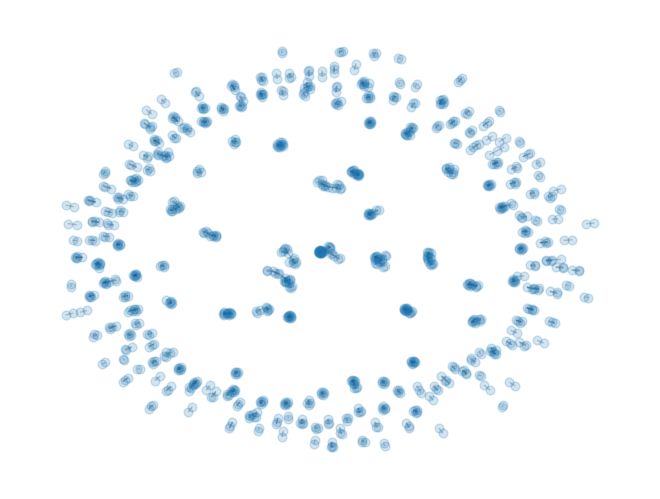

In [30]:
pos = nx.spring_layout(G)
nx.draw(G,pos=pos, node_size=40,alpha=.2)
with open("./data/Asignment_NETWORK.json",'w') as f:
  json.dump(json_graph.node_link_data(G),f)
nx.write_gml(G,"network.gml")